In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
base_path = "../data/track_a"


In [2]:
def read_jsonl(path, n=3):
    with open(path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f):
            if i >= n: break
            print(json.loads(line))

read_jsonl("../data/track_a/subtask_1/eng/eng_laptop_train_alltasks.jsonl")

{'ID': 'laptop_quad_dev_1', 'Text': 'this unit is ` ` pretty ` ` and stylish , so my high school daughter was attracted to it for that reason .', 'Quadruplet': [{'Aspect': 'unit', 'Category': 'LAPTOP#DESIGN_FEATURES', 'Opinion': 'pretty', 'VA': '7.12#7.12'}, {'Aspect': 'unit', 'Category': 'LAPTOP#DESIGN_FEATURES', 'Opinion': 'stylish', 'VA': '7.12#7.12'}]}
{'ID': 'laptop_quad_dev_2', 'Text': "for now i ' m okay with upping the experience & device to 3 out of 5 stars .", 'Quadruplet': [{'Aspect': 'device', 'Category': 'LAPTOP#GENERAL', 'Opinion': 'NULL', 'VA': '5.50#5.25'}]}
{'ID': 'laptop_quad_dev_3', 'Text': "seems unlikely but whatever , i ' ll go with it .", 'Quadruplet': [{'Aspect': 'NULL', 'Category': 'LAPTOP#GENERAL', 'Opinion': 'NULL', 'VA': '5.00#5.12'}]}


In [6]:
import pandas as pd

def parse_jsonl_to_df(path):
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            data = json.loads(line)
            text = data["Text"]
            for quad in data["Quadruplet"]:
                valence, arousal = quad["VA"].split("#")
                rows.append({
                    "ID": data["ID"],
                    "Text": text,
                    "Aspect": quad["Aspect"],
                    "Category": quad["Category"],
                    "Opinion": quad["Opinion"],
                    "Valence": float(valence),
                    "Arousal": float(arousal)
                })
    return pd.DataFrame(rows)

df = parse_jsonl_to_df("../data/track_a/subtask_3/eng/eng_laptop_train_alltasks.jsonl")
df.head()


,ID,Text,Aspect,Category,Opinion,Valence,Arousal
0,laptop_quad_dev_1,"this unit is ` ` pretty ` ` and stylish , so m...",unit,LAPTOP#DESIGN_FEATURES,pretty,7.12,7.12
1,laptop_quad_dev_1,"this unit is ` ` pretty ` ` and stylish , so m...",unit,LAPTOP#DESIGN_FEATURES,stylish,7.12,7.12
2,laptop_quad_dev_2,for now i ' m okay with upping the experience ...,device,LAPTOP#GENERAL,NULL,5.50,5.25
3,laptop_quad_dev_3,"seems unlikely but whatever , i ' ll go with it .",NULL,LAPTOP#GENERAL,NULL,5.00,5.12
4,laptop_quad_dev_4,this version has been my least favorite versio...,version,LAPTOP#GENERAL,least favorite,3.30,6.60


### Quick Dataset Overview

In [7]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5773 entries, 0 to 5772
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        5773 non-null   object 
 1   Text      5773 non-null   object 
 2   Aspect    5773 non-null   object 
 3   Category  5773 non-null   object 
 4   Opinion   5773 non-null   object 
 5   Valence   5773 non-null   float64
 6   Arousal   5773 non-null   float64
dtypes: float64(2), object(5)
memory usage: 315.8+ KB


ID          0
Text        0
Aspect      0
Category    0
Opinion     0
Valence     0
Arousal     0
dtype: int64

### Valence & Arousal Distributions

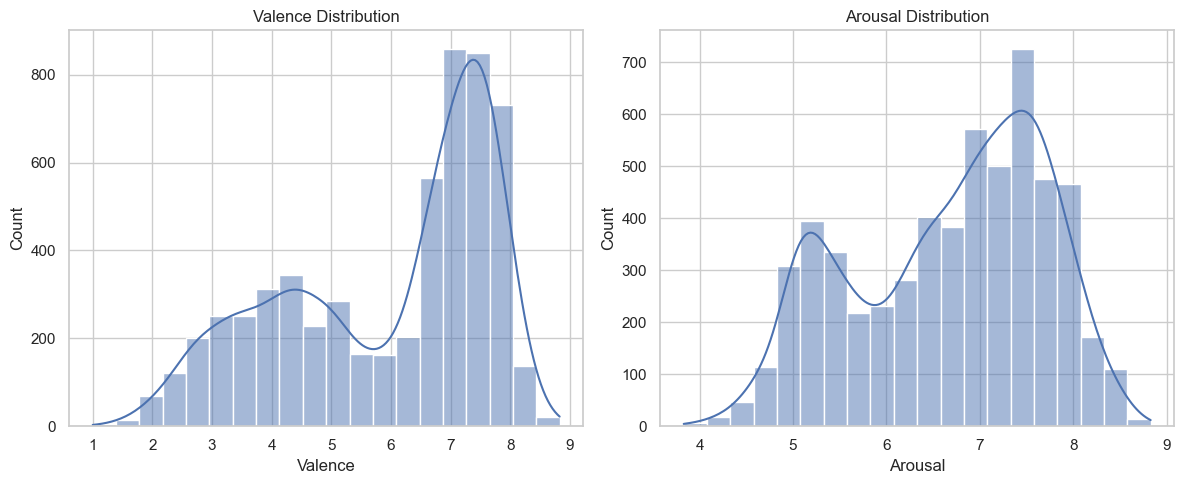

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["Valence"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Valence Distribution")

sns.histplot(df["Arousal"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Arousal Distribution")

plt.tight_layout()
plt.show()



### Category and Aspect Frequency

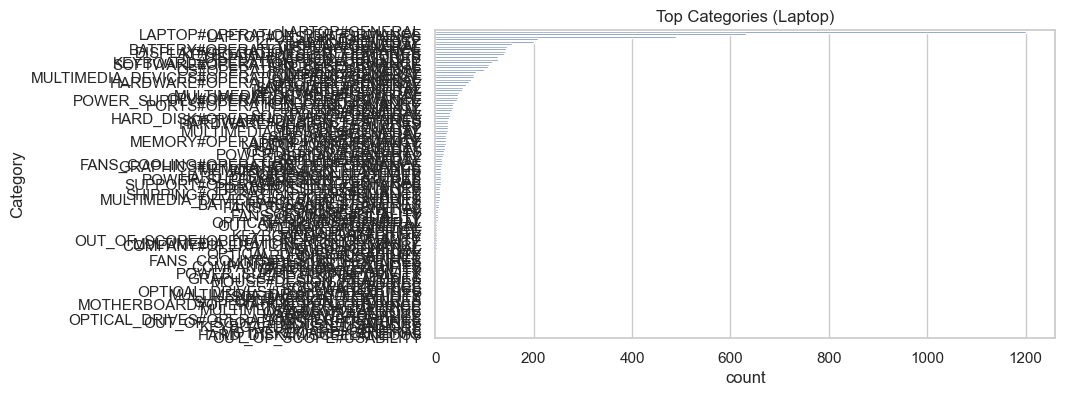

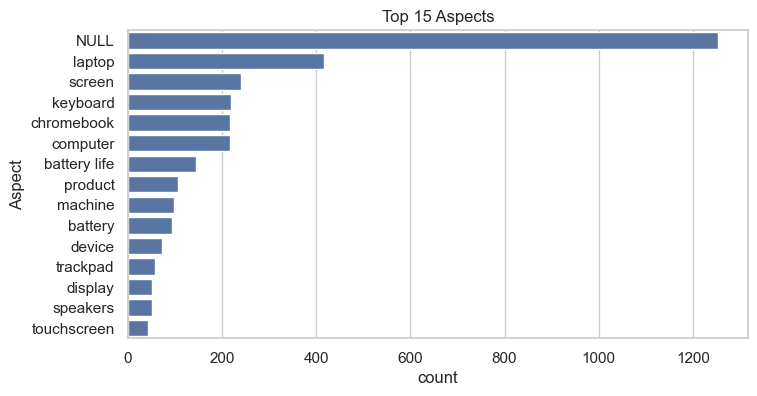

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(y=df["Category"], order=df["Category"].value_counts().index)
plt.title("Top Categories (Laptop)")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(y=df["Aspect"], order=df["Aspect"].value_counts().index[:15])
plt.title("Top 15 Aspects")
plt.show()


### Opinion Term Frequency

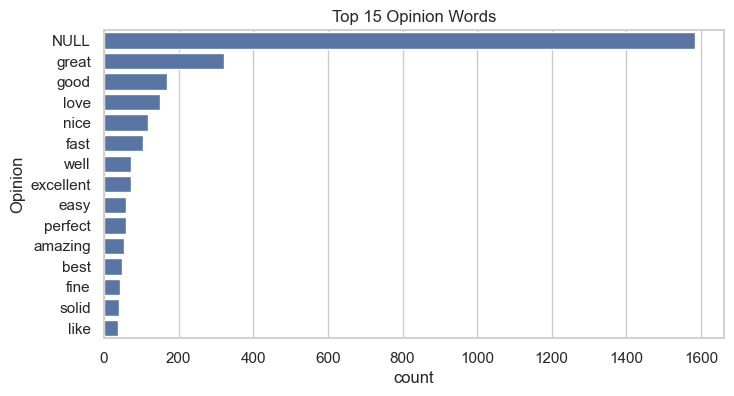

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(y=df["Opinion"], order=df["Opinion"].value_counts().index[:15])
plt.title("Top 15 Opinion Words")
plt.show()


### Correlation between Valence & Arousal

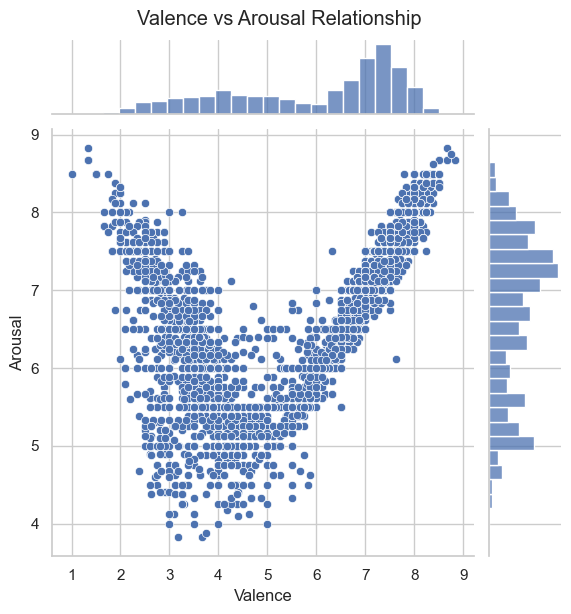

,Valence,Arousal
Valence,1.000000,0.598353
Arousal,0.598353,1.000000


In [11]:
sns.jointplot(data=df, x="Valence", y="Arousal", kind="scatter", height=6)
plt.suptitle("Valence vs Arousal Relationship", y=1.02)
plt.show()

df[["Valence", "Arousal"]].corr()


### Summarize key findings

In [12]:
summary = f"""
# EDA Summary (Laptop – Subtask 3)

- Total records: {len(df)}
- Unique aspects: {df['Aspect'].nunique()}
- Unique categories: {df['Category'].nunique()}
- Unique opinion words: {df['Opinion'].nunique()}
- Average Valence: {df['Valence'].mean():.2f}
- Average Arousal: {df['Arousal'].mean():.2f}
"""

with open("../reports/week1_data_summary.md", "w") as f:
    f.write(summary)

print(summary)



# EDA Summary (Laptop – Subtask 3)

- Total records: 5773
- Unique aspects: 956
- Unique categories: 121
- Unique opinion words: 1156
- Average Valence: 5.94
- Average Arousal: 6.67

